In [68]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import seaborn as sns
from src.coinjump.coinjump_learn.training.ppo_coinjump_logic_policy import NSFR_ActorCritic

In [69]:
#weight = torch.softmax(torch.tensor([[0.6796, 0.3204],
#                       [0.4077, 0.5923]]), dim=1)
# weight = torch.rand((5, 10)) * 10
# weight = nn.Parameter(torch.Tensor(torch.rand((5, 10))))
weight = torch.tensor([[ 3.1792, -2.6180, -3.8222, -3.4642, -0.9352, -2.5799, -2.1561, -3.3742,
         -3.1656, -4.4505],
        [-1.4009,  2.6436, -0.1500, -1.6209, -1.9514, -1.1981, -1.3335, -0.3877,
         -0.7455, -2.0397],
        [-0.9255, -0.1442, -1.7315,  2.8712,  0.1499, -0.5915, -1.9716, -1.3229,
         -0.7321, -1.4861],
        [-3.1801, -1.0150,  2.3178, -1.9568,  1.7142, -3.3784, -1.3852, -2.5220,
         -3.6084, -2.8335],
        [ 0.0787,  1.7879,  1.6804,  0.9046,  1.3699, -0.7250,  0.6453, -0.1483,
          0.1150, -0.0485]])
weight = torch.softmax(weight, dim=1)
print(weight)
name = 'test'

tensor([[9.6784e-01, 2.9384e-03, 8.8132e-04, 1.2607e-03, 1.5810e-02, 3.0525e-03,
         4.6635e-03, 1.3794e-03, 1.6994e-03, 4.7019e-04],
        [1.4193e-02, 8.1016e-01, 4.9582e-02, 1.1390e-02, 8.1845e-03, 1.7384e-02,
         1.5182e-02, 3.9093e-02, 2.7334e-02, 7.4928e-03],
        [1.8077e-02, 3.9485e-02, 8.0737e-03, 8.0538e-01, 5.2985e-02, 2.5245e-02,
         6.3504e-03, 1.2149e-02, 2.1934e-02, 1.0319e-02],
        [2.4897e-03, 2.1699e-02, 6.0793e-01, 8.4610e-03, 3.3244e-01, 2.0419e-03,
         1.4985e-02, 4.8079e-03, 1.6223e-03, 3.5211e-03],
        [4.4780e-02, 2.4739e-01, 2.2217e-01, 1.0227e-01, 1.6287e-01, 2.0047e-02,
         7.8914e-02, 3.5686e-02, 4.6435e-02, 3.9431e-02]])


In [90]:
def plot_weights(Ws, epoch=0):
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(15, 5))
    plt.ylim([0, 1])
    x_label = ['Jump', 'Left_key', 'Right_key', 'Left_door',
               'Right_door', 'Stay', 'Jump_door', 'Left_nothing', 'Right_enemy',
               'Stay_nothing']
    # x_label = ['Jump', 'Left_k', 'Right_k', 'Left_d',
    #            'Right_d', 'Stay', 'Jump_d', 'Left_n', 'Right_e',
    #            'Stay_n']
    x = np.arange(len(x_label))
    width = 0.18
    X = x - width * 3

    for i, W in enumerate(Ws):
        W_ = W.detach().cpu().numpy()

        X = X + width
        plt.bar(X, W_, width=width, alpha=1, label='C' + str(i))
        # plt.bar(range(len(W_)), W_, width=0.2, alpha=1, label='C' + str(i))

    plt.xticks(x, x_label,fontproperties="Microsoft YaHei",size = 12)
    plt.ylabel('Weights',size = 14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.savefig('W_' +
                str(epoch) + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

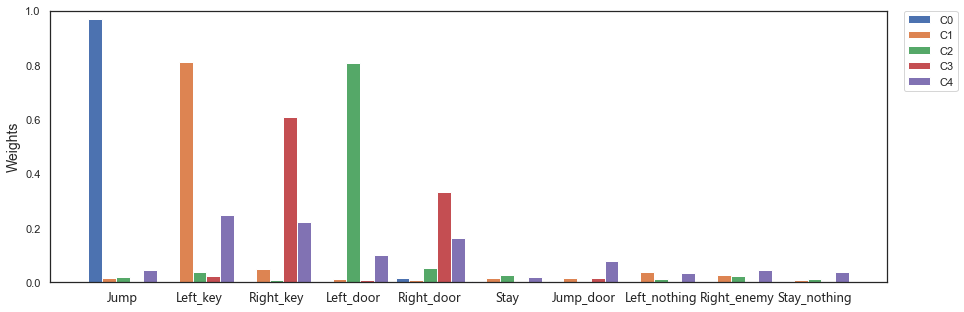

In [91]:
plot_weights(weight)

In [102]:
W = torch.Tensor(np.random.normal(size=(5,10)))
print(W)

tensor([[-1.8084,  0.9121, -0.9187, -0.1362,  0.0408,  0.3008, -0.5502, -1.4506,
         -0.1546, -0.3941],
        [-0.1951,  0.6629, -0.6411,  0.0401, -0.1281, -0.0409, -0.0428, -1.8261,
          0.4295, -0.2000],
        [ 0.7966, -2.0248, -0.6225, -1.7392, -0.4155, -0.0169, -0.9938,  0.0180,
          0.5132,  0.1126],
        [ 0.3167,  0.1149,  1.3250, -0.3933, -0.2486, -0.5174,  0.2057, -0.8237,
          0.0334, -1.7610],
        [-0.3866,  0.3514, -1.5169, -1.1955, -0.7005,  0.7061, -0.8795,  0.1385,
          0.1518,  1.6827]])
